In [74]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
plt.style.use('paperPlot')

In [3]:
def bootstrapping_mean(sample, nsamples):
    n = len(sample)
    samples = []
    for i in range(nsamples):
        samples.append(np.random.choice(sample, n, replace=True))
    sampleMeans = np.mean(samples, axis=0)
    return np.std(sampleMeans)

In [73]:
minBathRad = 43.26766777
maxBathRad = 158.266943
radii = np.linspace(minBathRad, maxBathRad, 10, endpoint=True)

In [99]:
midpoints = (radii[1:] + radii[:-1])/2.
radii = np.sort(np.append(radii, midpoints))

In [100]:
print radii

[  43.26766777   49.65651639   56.04536502   62.43421364   68.82306227
   75.21191089   81.60075951   87.98960814   94.37845676  100.76730539
  107.15615401  113.54500263  119.93385126  126.32269988  132.7115485
  139.10039713  145.48924575  151.87809438  158.266943  ]


In [101]:
path = '/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/'
mfpts = []
stds = []
fpts = []
for rad in radii:
    fpt = pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_2.p" % rad, 'r'))
    fpts.append(fpt)
    mfpts.append(np.mean(fpt))
    stds.append(np.std(fpt))
mfpts = np.array(mfpts)
stds = np.array(stds)

In [102]:
print bootstrapping_mean(fpts[0], 100000)
print stds/np.sqrt(200)
print mfpts

6587.80176354
[  151016.43558001   214979.79782408   313198.7384205    447898.50105057
   613644.68553226   718504.638841     790024.34532759  1411327.9509773
  1756404.52449338  1890089.55407903  2441428.88011452  3029123.4430573
  3009019.25365497  3750924.20658919  4635752.55271638  5463269.73786927
  5073245.8974756   6207731.1627452   7866244.35293491]
[  2.08424147e+06   3.10741312e+06   4.38116447e+06   6.70017495e+06
   9.46305711e+06   1.04058664e+07   1.27451472e+07   1.86803006e+07
   2.41885336e+07   2.91567983e+07   3.49116711e+07   4.19666576e+07
   4.28075634e+07   5.40199691e+07   7.26922087e+07   7.17557247e+07
   7.79479884e+07   9.62953274e+07   1.17021365e+08]


In [103]:
kon = 1/mfpts
kon_err = stds/(np.sqrt(200)*mfpts*mfpts)

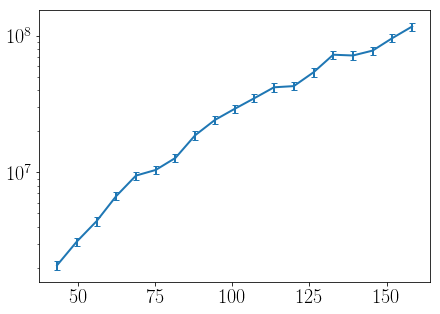

In [104]:
plt.errorbar(radii, mfpts, yerr=stds/np.sqrt(200))
plt.yscale('log')

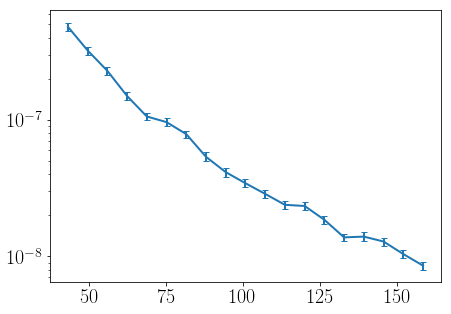

In [105]:
plt.errorbar(radii, kon, yerr=kon_err)
plt.yscale('log')

In [106]:
vols = np.pi*np.power(radii,3)*4./3.
Na = 6.022
c = 1./(Na*vols) * 1e10

In [200]:
print 1/(np.pi*np.power(43.26766777, 3)*4./3.*Na)*1e10
print 1/(np.power(50, 3)*Na)*1e10

4894.18273377
13284.6230488


In [197]:
np.power(8,2)

64

In [195]:
print c

[ 4894.18273377  3237.73942237  2251.91261315  1628.93104753  1216.09824546
   931.77439309   729.6053945    581.93769406   471.57635854   387.44646582
   322.19536334   270.81116494   229.79750033   196.66471263   169.60728008
   147.29416061   128.7294644    113.15798917    99.99999954]


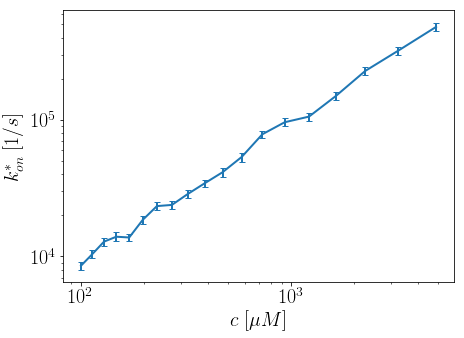

In [113]:
# convert from 1/ps to 1/s
plt.errorbar(c, kon*1e12, yerr=kon_err*1e12)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
#plt.savefig('../Paper/figs/myoglobin/onRateMyoglobin.pdf', bbox_inches='tight')

In [108]:
rate = np.diff(kon)/np.diff(c)*1e12 #1/(mu M s)
rate_err = (kon_err[1:] + kon_err[:-1])/np.diff(c)*1e12

In [109]:
print rate_err

[ -34.42779548  -39.13551569  -42.20701215  -40.76649887  -47.43910956
  -56.87821608  -60.32448286  -63.8486373   -62.10976302  -64.77169644
  -72.45458253  -81.97172083  -88.3540251   -79.92876024  -86.87049362
 -102.13143329  -96.61491147  -94.5347055 ]


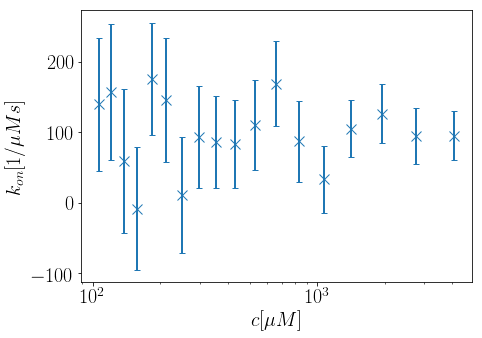

In [110]:
plt.errorbar((c[1:]+c[:-1])/2., rate, yerr=rate_err, fmt='x')
plt.xscale('log')
plt.xlabel('$c [\mu M]$')
plt.ylabel('$k_{on} [1/ \mu M s]$')
#plt.savefig('../Paper/figs/myoglobin/reactionRate.pdf', bbox_inches='tight')

In [111]:
print np.mean(rate)

98.2649623869


In [114]:
slope = np.polyfit(c, kon*1e12, 1)

In [115]:
print slope

[   98.75559795 -1906.88648987]


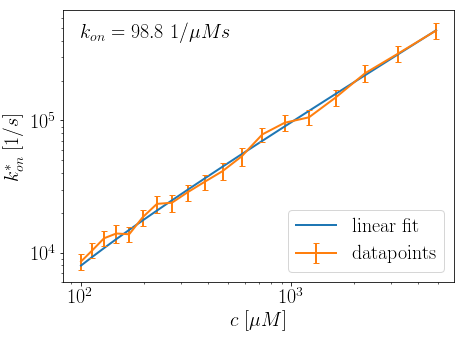

In [133]:
plt.plot(c, (slope[0]*c+slope[1]), label='linear fit')
plt.errorbar(c, kon*1e12, yerr=2*kon_err*1e12, label='datapoints')
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.text(100, 4*1e5, '$k_{on} = %0.1f~1/\mu M s$'%slope[0], fontsize=20)
plt.savefig('../Paper/figs/myoglobin/reactionRateFit.pdf')

In [134]:
from scipy import optimize

In [203]:
fitfunc = lambda p, x: p[0] + p[1]*x
errfunc = lambda p, x, y, err: (y-fitfunc(p, x))/err
out = optimize.leastsq(errfunc, [-1906, 98], args=(c, kon*1e12, 2*kon_err*1e12), full_output=1)

In [239]:
covar = out[1]
params = out[0]
print len(out)
print out[0]
print covar
print np.sqrt(covar[1][0])

5
[-721.43891454   95.36862553]
[[  9.05480215e+05  -3.37240165e+03]
 [ -3.37240165e+03   2.10874673e+01]]
nan


/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


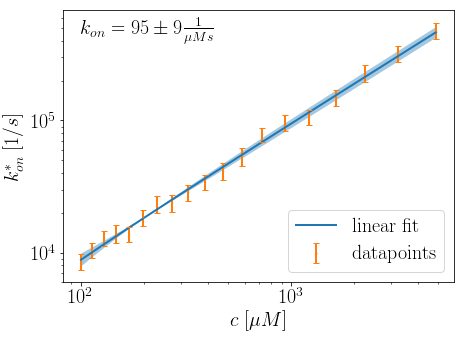

In [179]:
#plt.plot(c, (slope[0]*c+slope[1]), label='linear fit')
#plt.plot(c, (out[0][1]*c+out[0][0]), label='linear error fit')
plt.plot(c, params[1]*c + params[0], label='linear fit')
plt.fill_between(c, (params[1]+2*np.sqrt(covar[1][1]))*c + (params[0]-2*np.sqrt(covar[0][0])), (params[1]-2*np.sqrt(covar[1][1]))*c + (params[0]+2*np.sqrt(covar[0][0])), alpha=0.4)
plt.errorbar(c, kon*1e12, yerr=2*kon_err*1e12, label='datapoints', fmt='.', markersize=1)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.text(100, 4*1e5, '$k_{on} = %0.0f \pm %0.0f \\frac{1}{\mu M s}$'%(params[1], 2*np.sqrt(covar[1][1])), fontsize=20)
#plt.savefig('../Paper/figs/myoglobin/reactionRateFit.pdf', bbox_inches='tight')

In [185]:
print kon*1e12/c

[  98.03288569   99.39375827  101.35820459   91.62440265   86.89601837
  103.13616607  107.5392763    91.98979487   87.66746207   88.52143883
   88.90170226   87.98913587  101.65627479   94.12808568   81.10873824
   94.61454723   99.65913791   91.77186648   85.45448158]


# off rate

In [232]:
fpt_off = pickle.load(open("/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/fpts_off10000_runs_lag150_eps0.33_240partitions_lcs.p", 'r'))

In [233]:
print np.mean(fpt_off)
print 1/np.mean(fpt_off)

51438.78215
1.94405846757e-05


In [187]:
print c

[ 4894.18273377  3237.73942237  2251.91261315  1628.93104753  1216.09824546
   931.77439309   729.6053945    581.93769406   471.57635854   387.44646582
   322.19536334   270.81116494   229.79750033   196.66471263   169.60728008
   147.29416061   128.7294644    113.15798917    99.99999954]


In [188]:
0.93 * Na

5.600460000000001

In [207]:
(50.*50.*50.*6.022)*1e-4/10

7.527500000000001

In [208]:
95/19.4

4.896907216494846

In [236]:
means = []
rates = []
nsamples = 10000
for i in range(nsamples):
    sample = []
    ics = np.random.choice(10000, 10000, replace=True)
    for j in range(len(ics)):
        sample.append(fpt_off[0][ics[j]])
    means.append(np.mean(sample))
    rates.append(1/np.mean(sample))

In [213]:
a = np.array([1,2,3,4,5])

In [219]:
a[np.array([1.,3,2]).astype(int)]

array([2, 4, 3])

In [231]:
print 1/np.mean(fpt_off[0])

1.8763215519e-05


In [237]:
# use std as error estimate
print np.std(rates)

1.59745580414e-07


In [238]:
4.9*0.15

0.735